# **Import Library**

In [1]:
import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Memuat Dataset**

In [2]:
with open("dataset.arff", 'r') as f:
    data = arff.load(f)

columns = [attr[0] for attr in data['attributes']]

df = pd.DataFrame(data['data'], columns=columns)

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


# **Exploratory Data Analysis (EDA)**

## Struktur Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing value

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

print(missing_df)


              Missing Values  Percentage (%)
PoolQC                  1453       99.520548
MiscFeature             1406       96.301370
Alley                   1369       93.767123
Fence                   1179       80.753425
FireplaceQu              690       47.260274
LotFrontage              259       17.739726
GarageType                81        5.547945
GarageYrBlt               81        5.547945
GarageFinish              81        5.547945
GarageQual                81        5.547945
GarageCond                81        5.547945
BsmtExposure              38        2.602740
BsmtFinType2              38        2.602740
BsmtFinType1              37        2.534247
BsmtCond                  37        2.534247
BsmtQual                  37        2.534247
MasVnrArea                 8        0.547945
MasVnrType                 8        0.547945
Electrical                 1        0.068493


## Duplikat Value

In [7]:
print("Jumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


## Analisis Distribusi dan Korelasi

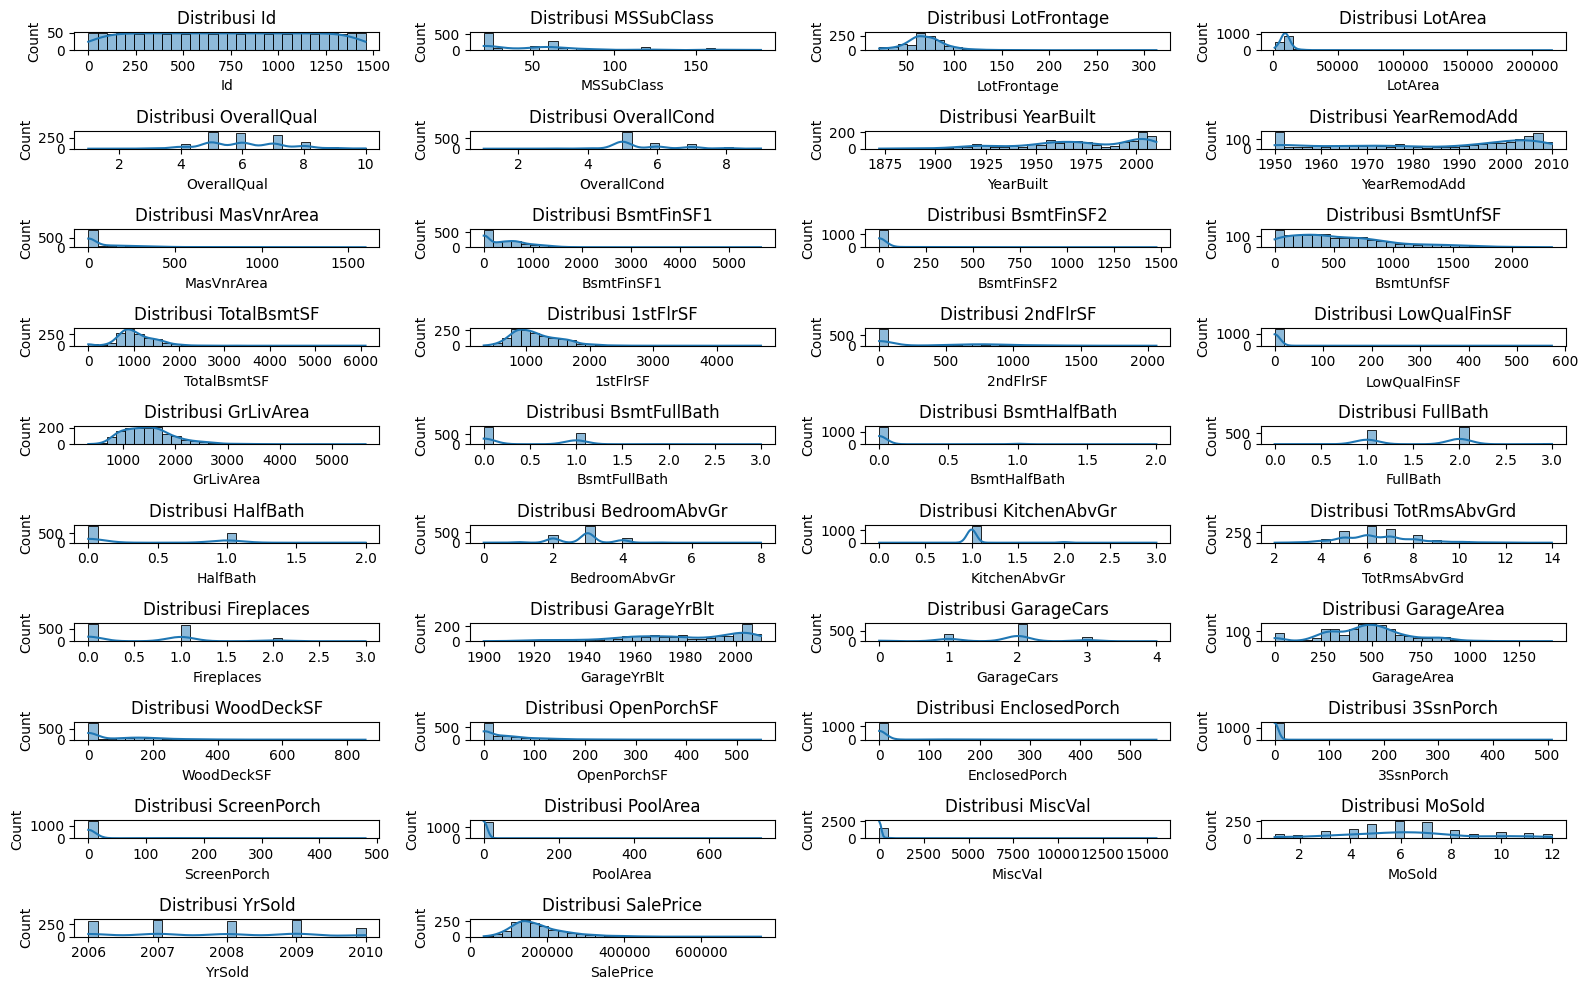

In [8]:
# Pilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//4 + 1, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

### Analisis Distribusi Kolom Numerik

Distribusi dari kolom-kolom numerik dalam dataset Ames Housing dapat dikategorikan sebagai berikut:

---

#### Distribusi Positif Skewed (Right-skewed)

Kolom-kolom berikut memiliki distribusi miring ke kanan (nilai rendah dominan, sedikit nilai tinggi):

- `LotArea`
- `MasVnrArea`
- `TotalBsmtSF`
- `GrLivArea`
- `1stFlrSF`
- `2ndFlrSF`
- `GarageArea`
- `SalePrice`
- `MiscVal`
- `WoodDeckSF`
- `OpenPorchSF`
- `EnclosedPorch`
- `ScreenPorch`
- `PoolArea`

**Interpretasi:**  
Sebagian besar rumah memiliki ukuran atau fitur kecil, hanya sedikit yang sangat besar atau mewah.

---

#### Distribusi Mendekati Normal

Fitur-fitur berikut memiliki distribusi yang relatif simetris dan menyerupai distribusi normal:

- `YearBuilt`
- `YearRemodAdd`
- `GarageYrBlt`
- `YrSold`
- `MoSold`
- `OverallQual`
- `OverallCond`
- `GarageCars`

**Interpretasi:**  
Fitur-fitur ini cocok digunakan langsung dalam model linear tanpa perlu transformasi.

---

#### Distribusi Diskrit / Kategori Terbatas

Kolom-kolom berikut adalah numerik tetapi memiliki jumlah nilai unik terbatas (diskrit):

- `Fireplaces`
- `HalfBath`
- `BsmtFullBath`
- `BsmtHalfBath`
- `FullBath`
- `BedroomAbvGr`
- `KitchenAbvGr


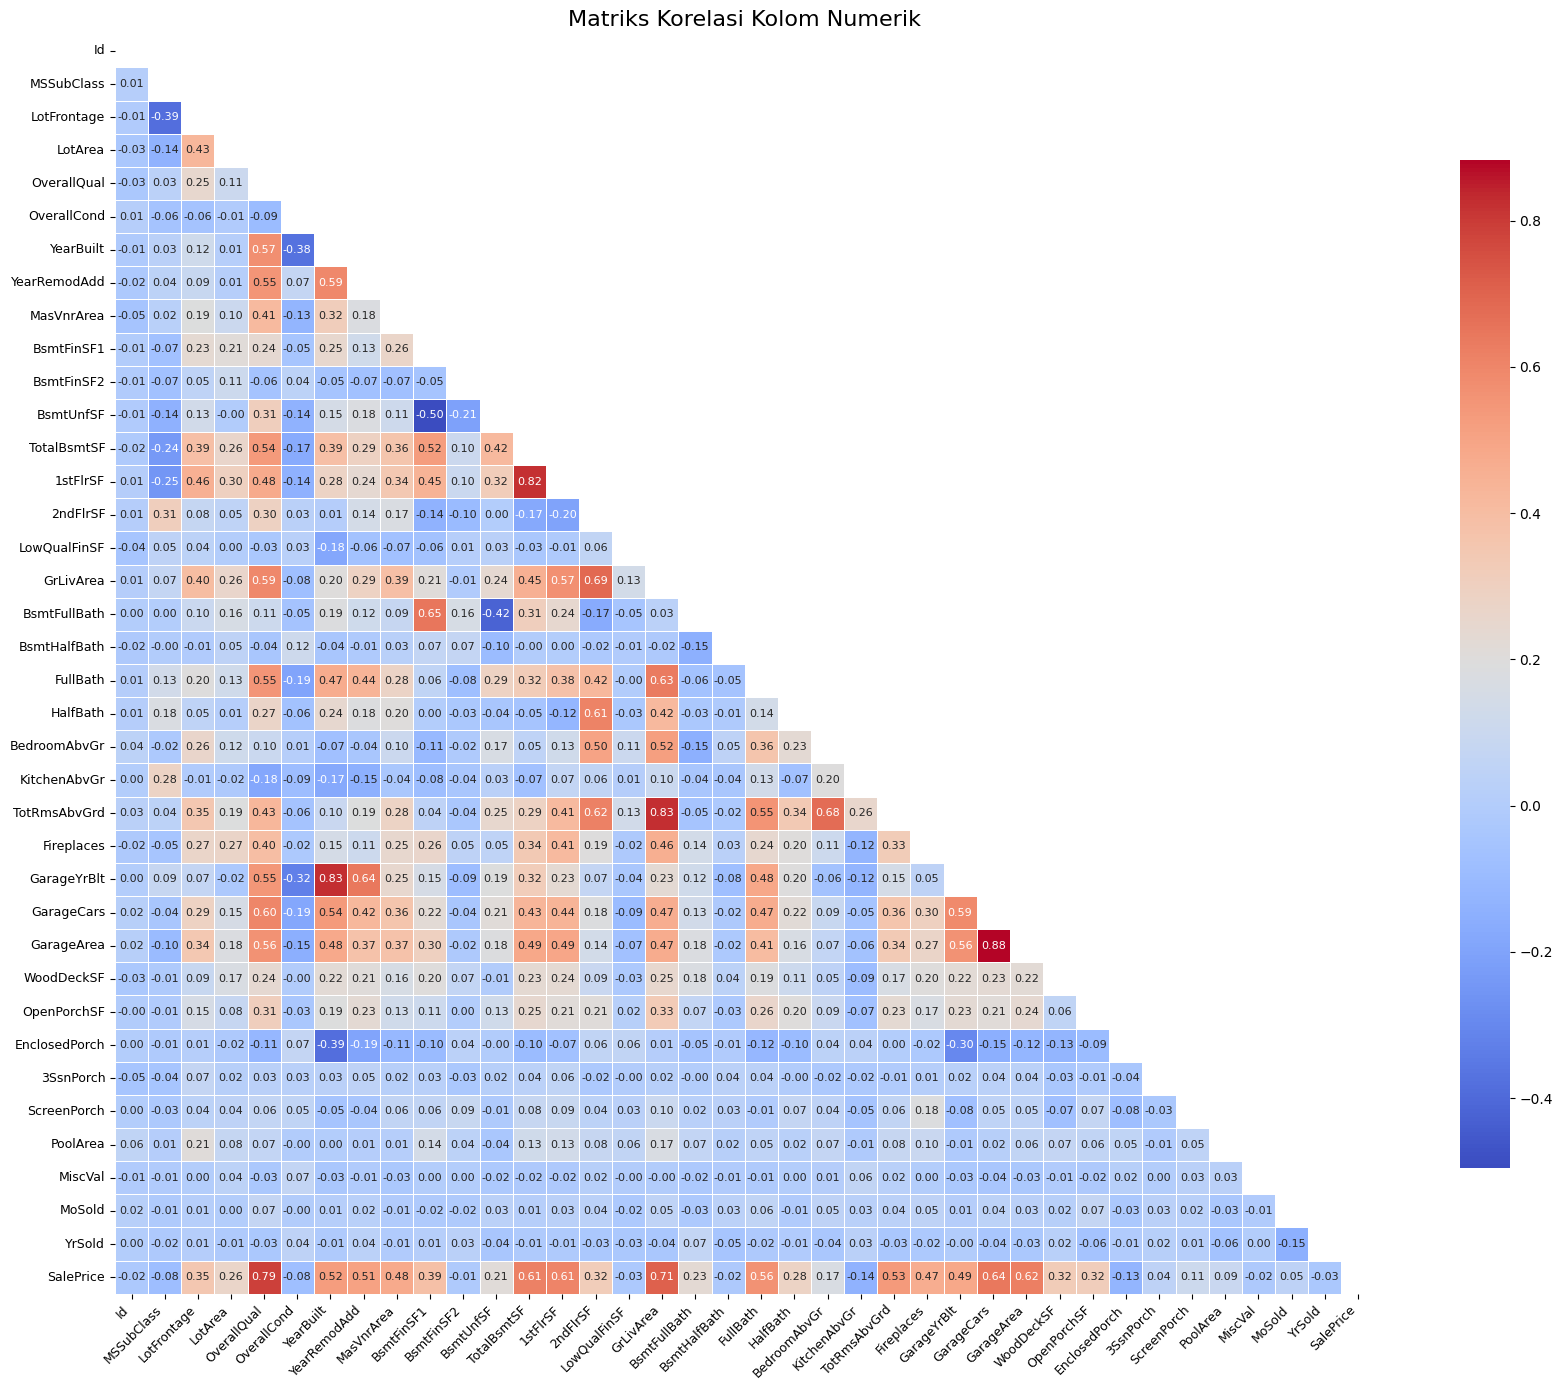

In [9]:
plt.figure(figsize=(18, 14))
corr = df[numerical_columns].corr()

# Membuat mask untuk hanya menampilkan bagian bawah matriks
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)

plt.title('Matriks Korelasi Kolom Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

### Analisis Matriks Korelasi Kolom Numerik

Matriks korelasi menampilkan hubungan linier antar fitur numerik dalam dataset menggunakan **koefisien korelasi Pearson**.

- Nilai **+1** → korelasi positif sempurna  
- Nilai **0** → tidak ada korelasi linier  
- Nilai **-1** → korelasi negatif sempurna

---

#### Korelasi terhadap `SalePrice` (Target)

Berikut beberapa kolom dengan korelasi **positif kuat** terhadap harga jual rumah (`SalePrice`):

| Kolom                | Koefisien Korelasi (±) | Interpretasi Singkat                                           |
|----------------------|------------------------|----------------------------------------------------------------|
| **OverallQual**      | ~ **0.79**             | Kualitas keseluruhan rumah → sangat memengaruhi harga          |
| **GrLivArea**        | ~ **0.71**             | Luas area tinggal di atas tanah                                |
| **GarageCars**       | ~ **0.64**             | Jumlah kapasitas mobil garasi → lebih representatif            |
| **GarageArea**       | ~ 0.62                 | Luas fisik garasi                                              |
| **TotalBsmtSF**      | ~ 0.61                 | Total luas basement                                            |
| **1stFlrSF**         | ~ 0.60                 | Luas lantai pertama                                            |
| **FullBath**         | ~ 0.56                 | Jumlah kamar mandi penuh                                       |
| **TotRmsAbvGrd**     | ~ 0.53                 | Jumlah total ruangan di atas tanah                             |
| **YearBuilt**        | ~ 0.52                 | Rumah yang lebih baru cenderung lebih mahal                    |
| **GarageYrBlt**      | ~ 0.50                 | Tahun pembangunan garasi                                       |

---

#### Fitur dengan Korelasi Lemah terhadap `SalePrice`

Beberapa kolom memiliki korelasi mendekati nol:

- `PoolArea`
- `LowQualFinSF`
- `MiscVal`
- `3SsnPorch`
- `ScreenPorch`
- `YrSold`, `MoSold`
- `Id`

**Interpretasi:**  
Fitur-fitur ini kemungkinan **tidak signifikan** dalam memprediksi harga jual secara linier dan bisa dipertimbangkan untuk dihapus atau diubah representasinya.

---

#### Korelasi Tinggi Antar Fitur

Selain korelasi ke `SalePrice`, beberapa fitur juga sangat berkorelasi antar sesama:

| Fitur 1           | Fitur 2           | Koefisien Korelasi | Catatan                                     |
|-------------------|-------------------|---------------------|---------------------------------------------|
| `GarageCars`      | `GarageArea`      | ~ **0.88**          | Representasi yang serupa, pilih salah satu  |
| `TotalBsmtSF`     | `1stFlrSF`        | ~ **0.82**          | Saling berhubungan kuat                     |
| `GrLivArea`       | `TotRmsAbvGrd`    | ~ **0.65**          | Lebih luas → cenderung punya lebih banyak kamar |
| `YearBuilt`       | `GarageYrBlt`     | ~ **0.83**          | Tahun rumah dan garasi biasanya berdekatan  |

**Catatan:**  
Multikolinearitas seperti ini dapat menyebabkan masalah pada model linear (misalnya Linear Regression).

---

#### Rekomendasi

- Gunakan fitur-fitur dengan korelasi tinggi terhadap `SalePrice` sebagai kandidat utama.
- Hindari **fitur yang sangat berkorelasi satu sama lain** untuk mengurangi redundansi dan multikolinearitas.
- Lakukan transformasi pada fitur skewed jika diperlukan agar model bekerja optimal.

---

> 📌 **Tips:**  
Untuk model linear atau regresi regularisasi (seperti Lasso), korelasi tinggi bisa berdampak negatif jika tidak ditangani. Gunakan teknik seleksi fitur untuk membantu memilih yang paling relevan.


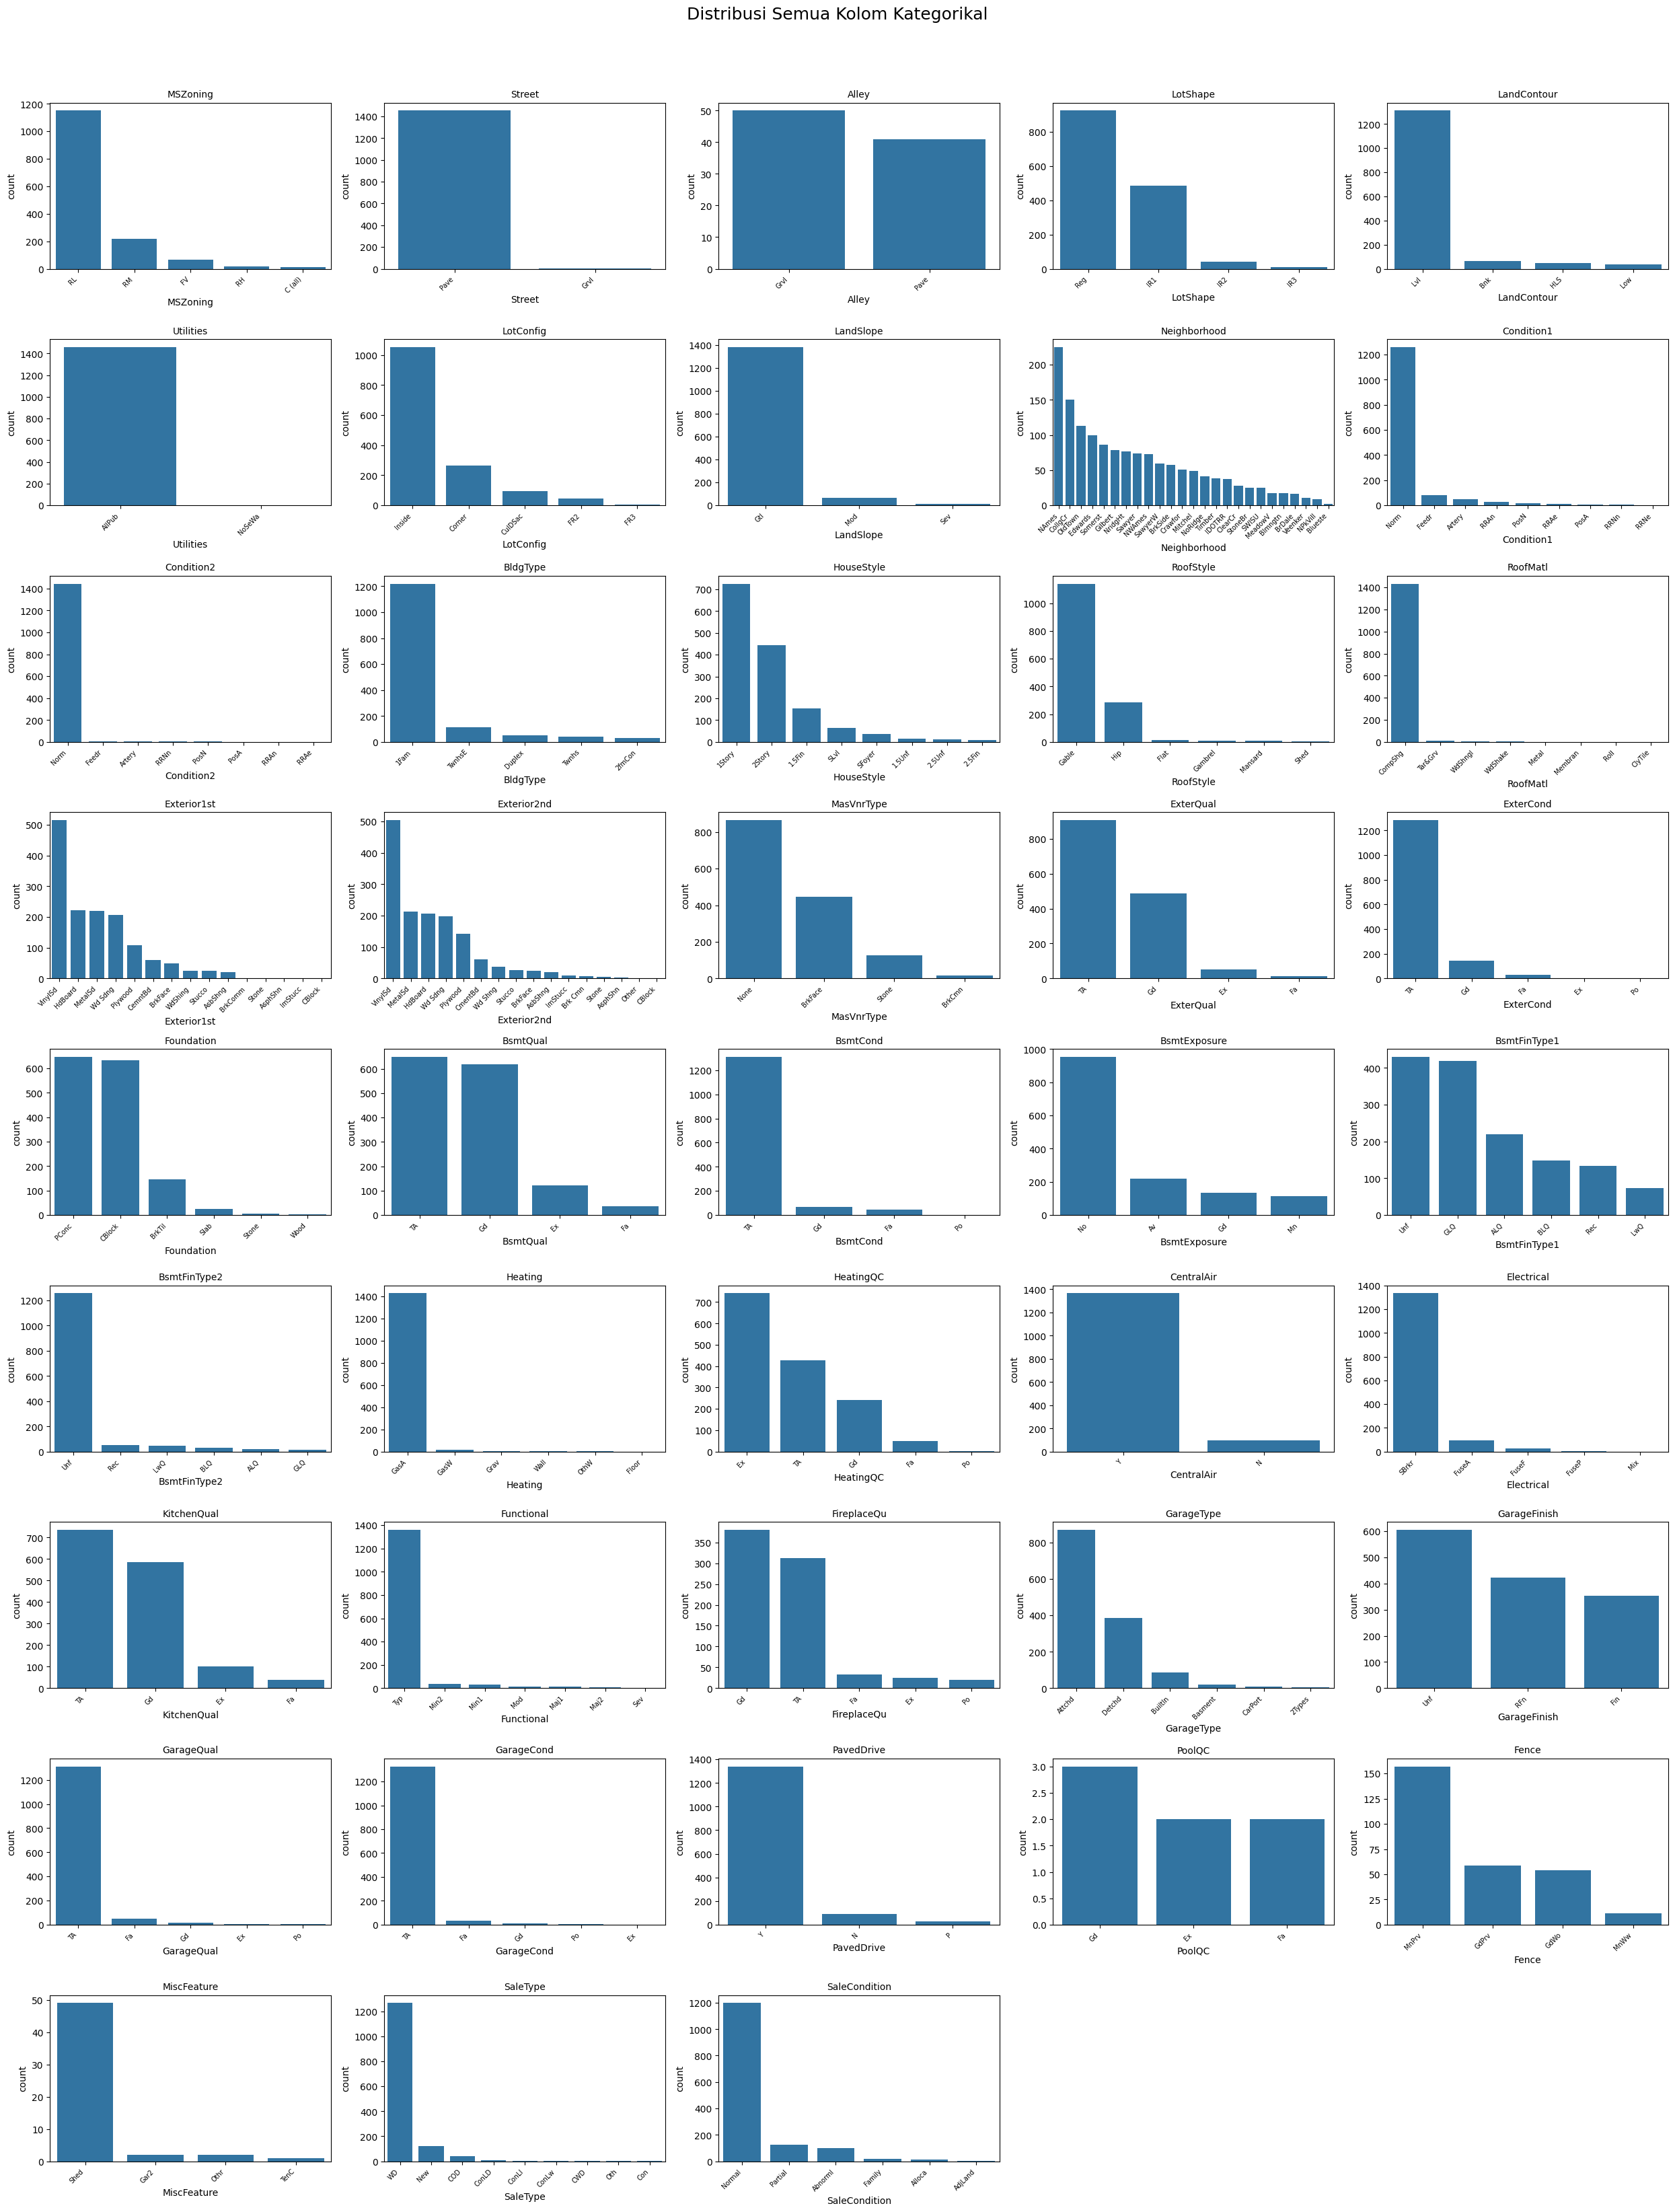

In [10]:
# Ambil semua kolom kategorikal (tipe objek)
categorical_columns = df.select_dtypes(include='object').columns

# Ukuran grid
n_cols = 5
n_rows = 10

# Buat figure besar
plt.figure(figsize=(n_cols * 5, n_rows * 3.5))  # Lebar x Tinggi per subplot

# Plot tiap kolom
for i, col in enumerate(categorical_columns[:n_cols * n_rows], 1):  # Batasi ke 50 kolom jika terlalu banyak
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.tight_layout()

# Judul besar (opsional)
plt.suptitle("Distribusi Semua Kolom Kategorikal", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### Analisis Distribusi Kolom Kategorikal

Visualisasi berikut menampilkan distribusi frekuensi untuk semua kolom kategorikal dalam dataset. Setiap subplot menunjukkan jumlah kemunculan (count) untuk masing-masing kategori pada setiap kolom.

#### Observasi Umum

1. **Distribusi Tidak Merata**  
   Banyak fitur kategorikal memiliki distribusi yang sangat tidak seimbang. Contohnya:
   - `MSZoning`: Mayoritas bernilai `RL`.
   - `Street`: Hampir semua `Pave`.
   - `Utilities`: Hampir semuanya `AllPub`.

2. **Kolom dengan Kategori Dominan**
   - `LandContour`, `LotConfig`, `RoofStyle`, dan `Foundation` menunjukkan dominasi satu nilai kategori dengan sedikit variasi lainnya.
   - `CentralAir`: Hampir semua `Y`.

3. **Kolom dengan Variasi Tinggi**
   - `Neighborhood`: Memiliki distribusi kategori yang cukup bervariasi.
   - `Exterior1st` dan `Exterior2nd`: Juga menunjukkan keragaman yang tinggi dalam kategori.

4. **Kolom dengan Nilai Kosong atau Tidak Ada**
   - `Alley`, `Fence`, dan `MiscFeature` memiliki banyak nilai kosong (`NaN`) atau `None`, yang harus ditangani dalam preprocessing (misalnya dengan imputasi atau encoding khusus).

5. **Kolom Lain yang Menarik**
   - `GarageType`, `GarageFinish`, dan `GarageQual`: Menunjukkan distribusi yang cukup merata namun tetap dengan kategori dominan.
   - `SaleCondition`: Kategori `Normal` mendominasi data penjualan.

#### Implikasi terhadap Preprocessing

- **Encoding**:  
  Kolom dengan banyak kategori unik seperti `Neighborhood`, `Exterior1st`, atau `Exterior2nd` mungkin lebih cocok untuk encoding target atau frequency encoding daripada one-hot encoding untuk menghindari curse of dimensionality.

- **Imputasi**:  
  Fitur seperti `Alley`, `Fence`, dan `MiscFeature` bisa diisi dengan nilai `'None'` atau `'Unknown'`, tergantung konteksnya.

- **Penghapusan Fitur**:  
  Fitur seperti `Utilities` yang hampir konstan bisa dipertimbangkan untuk dihapus karena tidak memberikan informasi yang berguna untuk pemodelan.

---

Gambar distribusi ini sangat membantu untuk:
- Memahami ketidakseimbangan kategori.
- Menentukan strategi encoding.
- Mengidentifikasi fitur yang redundan atau tidak informatif.



C:\Users\refam\AppData\Local\Temp\ipykernel_22544\3983171960.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\refam\AppData\Local\Temp\ipykernel_22544\3983171960.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\refam\AppData\Local\Temp\ipykernel_22544\3983171960.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\refam\AppData\Local\Temp\ipykernel_22544\3983171960.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\refam\AppData\Local\Temp\ipykernel_22544\3983171960.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\refam\AppData\Local\Temp\ipykernel_22544\3983171960.py:11: RuntimeWarning: invali

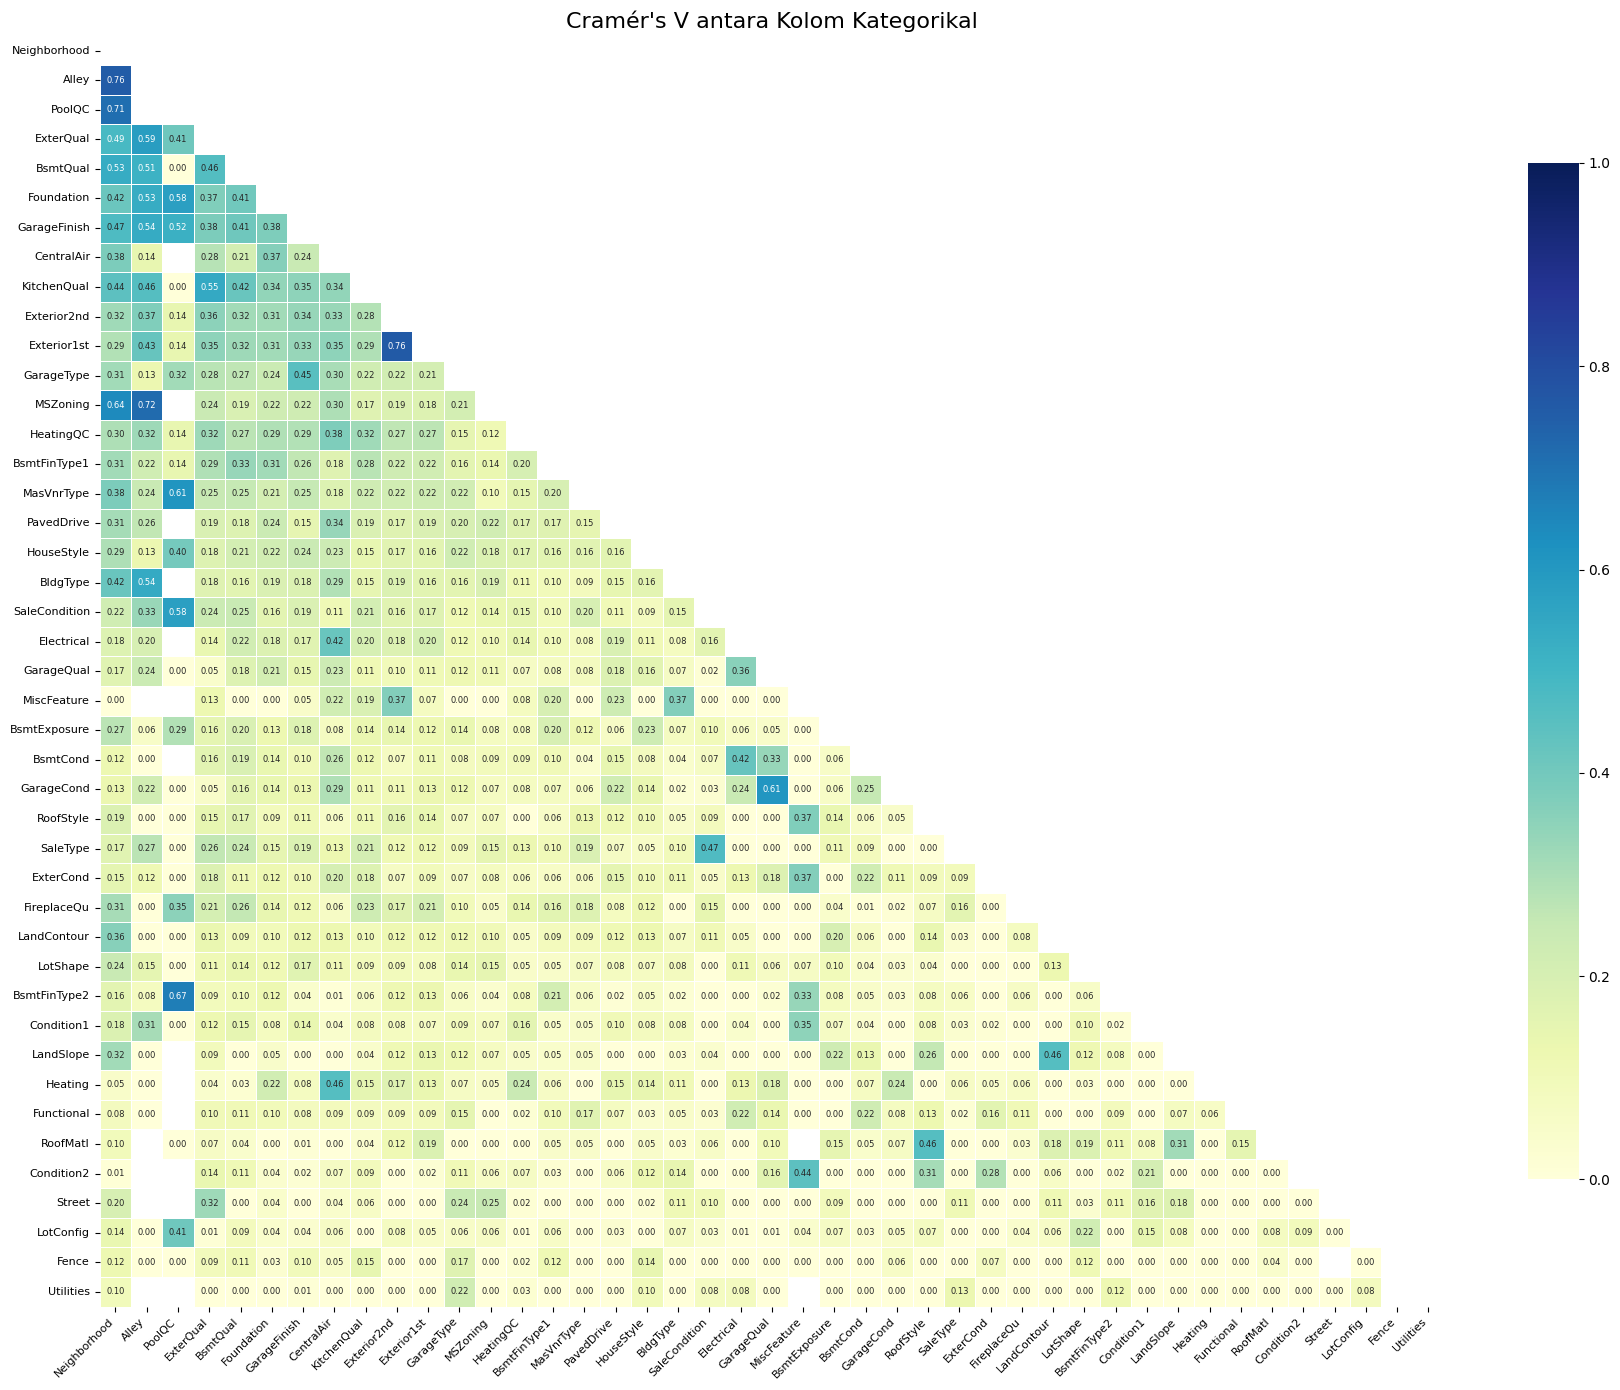

In [11]:
# Fungsi untuk menghitung Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Ambil kolom kategorikal
cat_cols = df.select_dtypes(include='object').columns

# Hitung matriks Cramér's V
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
for col1 in cat_cols:
    for col2 in cat_cols:
        try:
            cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        except:
            cramer_matrix.loc[col1, col2] = np.nan

# Urutkan berdasarkan korelasi rata-rata
ordered_cols = cramer_matrix.mean().sort_values(ascending=False).index
cramer_matrix = cramer_matrix.loc[ordered_cols, ordered_cols]

# Buat mask segitiga atas
mask = np.triu(np.ones_like(cramer_matrix, dtype=bool))

# Plot dengan ukuran font lebih kecil
plt.figure(figsize=(18, 14))
sns.heatmap(
    cramer_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},  # <<< Ukuran angka lebih kecil
    cmap="YlGnBu",
    vmin=0,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Cramér's V antara Kolom Kategorikal", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### Korelasi Antar Kolom Kategorikal (Cramér's V)

#### Apa itu Cramér's V?

Cramér's V adalah ukuran asosiasi antar dua variabel kategorikal. Nilainya berada dalam rentang:

- `0.00 – 0.10` : Hampir tidak ada hubungan
- `0.10 – 0.20` : Hubungan sangat lemah
- `0.20 – 0.40` : Hubungan lemah
- `0.40 – 0.60` : Hubungan sedang
- `0.60 – 0.80` : Hubungan kuat
- `0.80 – 1.00` : Hubungan sangat kuat atau redundan

Nilai 1 menunjukkan bahwa dua kolom kategorikal memiliki ketergantungan sempurna.

---

#### Interpretasi Heatmap

- Matriks ini hanya menampilkan **segitiga bawah** untuk menghindari duplikasi dan meningkatkan keterbacaan.
- **Semua nilai korelasi ditampilkan**, bahkan yang sangat kecil (<0.2), karena ini penting untuk deteksi **redundansi rendah** sekalipun.
- **Ukuran angka kecil** agar tidak mendominasi visual.

---

#### Contoh Korelasi Tinggi

Beberapa pasangan kolom yang memiliki **korelasi tinggi** (Cramér's V > 0.5) dan perlu diperhatikan:

| Kolom 1         | Kolom 2         | Nilai Cramér's V | Catatan                              |
|------------------|------------------|------------------|---------------------------------------|
| `Exterior1st`    | `Exterior2nd`    | ≈ 0.76           | Sangat mirip, bisa redundant          |
| `PoolQC`         | `Alley`          | ≈ 0.77           | Kuat, tapi karena banyak missing, hati-hati interpretasi |
| `ExterQual`      | `BsmtQual`       | ≈ 0.55           | Kualitas luar dan basement terkorelasi |
| `GarageFinish`   | `BsmtQual`       | ≈ 0.53           | Hubungan kuat antara kualitas basement dan garasi |
| `MSZoning`       | `Neighborhood`   | ≈ 0.52           | Lokasi dan zoning menunjukkan asosiasi |
| `SaleCondition`  | `MSZoning`       | ≈ 0.53           | Zoning dan kondisi penjualan terkait |

---

#### Kesimpulan

- Beberapa fitur seperti `Exterior1st` dan `Exterior2nd`, atau `PoolQC` dan `Alley`, kemungkinan **redundan** dan bisa dipertimbangkan untuk digabung atau dipilih salah satu.
- Fitur yang tidak memiliki korelasi berarti (V < 0.1) seperti `Utilities`, `Fence`, `Street` kemungkinan dapat berdiri sendiri atau kurang informatif.

Gunakan hasil ini sebagai dasar untuk **feature selection**, **reduksi dimensi**, atau **engineering fitur baru** dari kombinasi kolom terkait.


# **Data Preprocessing**

## Preprocessing Missing value

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

print(missing_df)


              Missing Values  Percentage (%)
PoolQC                  1453       99.520548
MiscFeature             1406       96.301370
Alley                   1369       93.767123
Fence                   1179       80.753425
FireplaceQu              690       47.260274
LotFrontage              259       17.739726
GarageType                81        5.547945
GarageYrBlt               81        5.547945
GarageFinish              81        5.547945
GarageQual                81        5.547945
GarageCond                81        5.547945
BsmtExposure              38        2.602740
BsmtFinType2              38        2.602740
BsmtFinType1              37        2.534247
BsmtCond                  37        2.534247
BsmtQual                  37        2.534247
MasVnrArea                 8        0.547945
MasVnrType                 8        0.547945
Electrical                 1        0.068493


Kode ini mencari kolom dalam DataFrame `df` yang memiliki nilai hilang (`NaN`), lalu menampilkan:

- Jumlah nilai hilang per kolom (`Missing Values`)
- Persentase dari total baris (`Percentage (%)`)
- Diurutkan dari yang paling banyak hilang

Hasilnya membantu memutuskan:
- Apakah kolom perlu dihapus (jika terlalu banyak kosong)
- Atau perlu imputasi (pengisian nilai)

Berikut adalah kolom-kolom dengan nilai yang hilang (`NaN`) beserta jumlah dan persentasenya:

| Kolom         | Missing Values | Persentase (%) | Penjelasan                                                                 |
|---------------|----------------|----------------|-------------------------------------------------------------------------------------|
| `PoolQC`      | 1453           | 99.52%         | Hampir semua data hilang → kemungkinan besar tidak berguna, bisa dihapus.          |
| `MiscFeature` | 1406           | 96.30%         | Sangat banyak yang hilang → bisa dihapus kecuali informasi ini sangat penting.     |
| `Alley`       | 1369           | 93.77%         | Sama seperti di atas, bisa dihapus.                                                |
| `Fence`       | 1179           | 80.75%         | Sebagian besar hilang → pertimbangkan untuk dihapus atau imputasi.                 |
| `FireplaceQu` | 690            | 47.26%         | Hampir setengah data hilang → pertimbangkan untuk imputasi (misalnya "No FP").     |
| `LotFrontage` | 259            | 17.74%         | Cukup signifikan → bisa diimputasi dengan median berdasarkan lingkungan.           |
| `Garage*`     | 81             | 5.55%          | Kelima kolom terkait `Garage` hilang serentak, bisa diimputasi atau dihapus.       |
| `Bsmt*`       | ~37–38         | ~2.5–2.6%      | Kolom-kolom basement → bisa diimputasi ("No Bsmt" untuk kategorikal, median untuk numerik). |
| `MasVnr*`     | 8              | 0.55%          | Sedikit hilang → sebaiknya diimputasi.                                             |
| `Electrical`  | 1              | 0.07%          | Sangat sedikit → langsung diisi dengan modus (nilai paling sering).                |

👉 **Kesimpulan**:
- Kolom dengan >80% missing (seperti `PoolQC`, `Alley`) biasanya dihapus.
- Kolom dengan missing sedang atau rendah bisa diimputasi dengan pendekatan yang sesuai.


In [13]:
df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)


Menghapus kolom yang memiliki persentase missing values sangat tinggi (lebih dari 90%), sehingga dianggap tidak informatif atau terlalu banyak data hilang untuk dianalisis lebih lanjut.

In [14]:
none_cols = ['FireplaceQu', 'Fence', 'GarageType', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'MasVnrType']
df[none_cols] = df[none_cols].fillna('None')


Agar model machine learning tidak menganggap nilai kosong (NaN) sebagai kesalahan data, tapi sebagai kondisi valid (misalnya: tidak ada garasi, tidak ada perapian, dll).

In [15]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))


Agar imputasi LotFrontage lebih kontekstual dan akurat, dibanding hanya pakai median global. Median per Neighborhood lebih representatif karena ukuran lahan biasanya bergantung pada lokasi.

In [16]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


Menandakan bahwa jika tidak ada data luas veneer (batu bata hias pada dinding luar), maka diasumsikan tidak ada veneer yang dipasang (area = 0).

In [17]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)


Menandakan bahwa tidak ada garasi yang dibangun, sehingga tidak relevan untuk mencantumkan tahun pembangunannya.

In [18]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


Mengisi nilai kosong (NaN) pada kolom Electrical dengan nilai yang paling sering muncul (modus) dalam kolom tersebut.

In [19]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

## Preprocessing Outlier

In [20]:
# Buat DataFrame hasil deteksi outlier
outlier_report = []

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    perc_outliers = 100 * num_outliers / df.shape[0]
    
    if num_outliers > 0:
        outlier_report.append({
            'Column': col,
            'Outliers': num_outliers,
            'Percentage': round(perc_outliers, 2)
        })

outlier_df = pd.DataFrame(outlier_report).sort_values(by='Percentage', ascending=False)
print(outlier_df)

           Column  Outliers  Percentage
26  EnclosedPorch       208       14.25
8      BsmtFinSF2       167       11.44
4     OverallCond       125        8.56
28    ScreenPorch       116        7.95
0      MSSubClass       103        7.05
6      MasVnrArea        98        6.71
1     LotFrontage        93        6.37
16   BsmtHalfBath        82        5.62
21    GarageYrBlt        81        5.55
25    OpenPorchSF        77        5.27
2         LotArea        69        4.73
18   KitchenAbvGr        68        4.66
31      SalePrice        61        4.18
10    TotalBsmtSF        61        4.18
30        MiscVal        52        3.56
17   BedroomAbvGr        35        2.40
24     WoodDeckSF        32        2.19
14      GrLivArea        31        2.12
19   TotRmsAbvGrd        30        2.05
9       BsmtUnfSF        29        1.99
13   LowQualFinSF        26        1.78
27      3SsnPorch        24        1.64
23     GarageArea        21        1.44
11       1stFlrSF        20        1.37


### Deteksi Outlier pada Fitur Numerik

#### enjelasan Proses

Analisis ini bertujuan untuk mendeteksi **outlier** (nilai ekstrem) pada setiap kolom numerik dalam dataset. Metode yang digunakan adalah **IQR (Interquartile Range)**, yaitu dengan menghitung rentang antar kuartil dan menentukan batas bawah serta atas untuk mendeteksi nilai-nilai yang berada jauh di luar sebaran umum data.

Setiap fitur numerik dianalisis, dan jika ditemukan nilai yang berada di luar batas normal (di bawah Q1 - 1.5×IQR atau di atas Q3 + 1.5×IQR), maka nilai tersebut dianggap sebagai outlier.

#### Hasil Output

Hasilnya adalah sebuah tabel yang menunjukkan:

- **Nama kolom** yang memiliki outlier
- **Jumlah** outlier yang terdeteksi pada kolom tersebut
- **Persentase** outlier terhadap jumlah total data

Sebagai contoh, kolom `EnclosedPorch` memiliki 208 outlier atau sekitar 14.25% dari total data, menjadikannya fitur dengan jumlah outlier tertinggi. Fitur lain seperti `BsmtFinSF2`, `OverallCond`, dan `ScreenPorch` juga menunjukkan persentase outlier yang cukup signifikan.

#### Tujuan Analisis

Tujuan dari proses ini adalah:

- Mengidentifikasi fitur yang rentan terhadap nilai ekstrem
- Membantu pengambilan keputusan dalam **pra-pemrosesan data**, seperti:
  - Menghapus outlier
  - Menandainya sebagai kategori khusus
  - Melakukan transformasi (misalnya log-scaling atau capping)

#### Catatan Penting

- Tidak semua outlier harus dihapus — tergantung konteks data dan kebutuhan model.
- Beberapa outlier bisa jadi mencerminkan kondisi nyata (misalnya properti sangat besar atau unik).

In [21]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df, numerical_columns)

Membersihkan dataset dari nilai-nilai ekstrem (outliers) yang bisa mengganggu performa model machine learning dan membuat distribusi data lebih normal dan stabil.

In [22]:
# Buat DataFrame hasil deteksi outlier
outlier_report = []

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    perc_outliers = 100 * num_outliers / df.shape[0]
    
    if num_outliers > 0:
        outlier_report.append({
            'Column': col,
            'Outliers': num_outliers,
            'Percentage': round(perc_outliers, 2)
        })

outlier_df = pd.DataFrame(outlier_report).sort_values(by='Percentage', ascending=False)
print(outlier_df)

         Column  Outliers  Percentage
5    GarageCars       167       32.36
4  TotRmsAbvGrd        60       11.63
1       LotArea        23        4.46
0   LotFrontage        17        3.29
6    GarageArea        12        2.33
2    MasVnrArea         7        1.36
3     GrLivArea         5        0.97
8     SalePrice         3        0.58
7   OpenPorchSF         2        0.39


### Interpretasi Output Deteksi Outlier

Output berikut menunjukkan jumlah dan persentase nilai outlier untuk beberapa fitur numerik sebelum dilakukan pembersihan:

| Kolom           | Jumlah Outlier | Persentase (%) |
|------------------|----------------|----------------|
| GarageCars       | 167            | 32.36%         |
| TotRmsAbvGrd     | 60             | 11.63%         |
| LotArea          | 23             | 4.46%          |
| LotFrontage      | 17             | 3.29%          |
| GarageArea       | 12             | 2.33%          |
| MasVnrArea       | 7              | 1.36%          |
| GrLivArea        | 5              | 0.97%          |
| SalePrice        | 3              | 0.58%          |
| OpenPorchSF      | 2              | 0.39%          |

#### Penjelasan Per Fitur:

- **GarageCars (32.36%)**:  
  Menunjukkan bahwa lebih dari sepertiga rumah memiliki jumlah garasi yang dianggap ekstrem menurut distribusi umum.  
  Namun, ini *masih bisa dianggap wajar*, terutama dalam konteks Amerika Serikat yang cenderung **car-centric** (berbasis kendaraan), di mana memiliki 3 atau lebih garasi bukan hal yang luar biasa.

- **TotRmsAbvGrd (11.63%)**:  
  Rumah dengan jumlah total ruangan di atas tanah yang tinggi. Bisa mencerminkan rumah besar atau rumah dengan tata ruang tidak umum.

- **LotArea (4.46%) & LotFrontage (3.29%)**:  
  Outlier pada ukuran tanah dan lebar depan lahan. Bisa disebabkan oleh rumah yang berada di lahan besar seperti pedesaan atau lahan komersial.

- **GarageArea (2.33%)**:  
  Ukuran fisik garasi yang besar, mendukung temuan pada `GarageCars`.

- **MasVnrArea (1.36%) & GrLivArea (0.97%)**:  
  Mewakili luas veneer batu bata dan luas area tinggal — outlier kecil mungkin mencerminkan rumah mewah atau desain arsitektur unik.

- **SalePrice (0.58%)**:  
  Harga jual rumah yang sangat tinggi, bisa mencerminkan properti premium atau lokasi elit.

- **OpenPorchSF (0.39%)**:  
  Luas teras terbuka yang sangat besar — mungkin tidak umum tapi tidak terlalu signifikan secara statistik.

#### Kesimpulan:

- Meskipun ada nilai yang dianggap outlier secara statistik, *tidak semua outlier harus dihapus*.  
- Beberapa nilai ekstrem **masih bisa wajar tergantung konteks** (contohnya `GarageCars` di lingkungan suburb Amerika).
- Outlier yang relevan secara domain knowledge bisa menjadi sinyal penting untuk analisis lanjutan.


## Preprocessing Encoding

In [23]:
# Pilih hanya kolom bertipe object (kategorikal)
categorical_columns = df.select_dtypes(include=['object'])

# Hitung jumlah kategori unik di setiap kolom kategorikal
category_counts = categorical_columns.nunique()

# Tampilkan hasil
print(category_counts)

MSZoning          4
Street            1
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         2
Neighborhood     22
Condition1        8
Condition2        1
BldgType          4
HouseStyle        6
RoofStyle         3
RoofMatl          1
Exterior1st      10
Exterior2nd      12
MasVnrType        4
ExterQual         3
ExterCond         3
Foundation        4
BsmtQual          4
BsmtCond          3
BsmtExposure      5
BsmtFinType1      6
BsmtFinType2      1
Heating           2
HeatingQC         4
CentralAir        2
Electrical        4
KitchenQual       4
Functional        4
FireplaceQu       6
GarageType        4
GarageFinish      3
GarageQual        3
GarageCond        4
PavedDrive        3
Fence             5
SaleType          9
SaleCondition     5
dtype: int64


###  Ringkasan Penjelasan

Kode ini menghitung jumlah kategori unik di setiap kolom bertipe kategorikal (*object*) dalam DataFrame.

#### Tujuan:
Sebagai bahan pertimbangan untuk memilih metode encoding yang tepat.

#### Interpretasi Output:
- Kolom seperti `Neighborhood` (22 kategori) cocok untuk **target encoding** atau **embedding**.
- Kolom dengan 2–10 kategori cocok untuk **one-hot encoding**.
- Kolom dengan hanya 1 kategori (misalnya `Street`, `Utilities`) **tidak informatif** dan bisa dihapus.


In [24]:
df.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtFinType2'], inplace=True)


In [25]:
ord_maps = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['Unf', 'RFn', 'Fin'],
    'PavedDrive': ['N', 'P', 'Y'],
}

# Lakukan encoding satu per satu kolom ordinal
for col, categories in ord_maps.items():
    encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=-1)
    df[[col]] = encoder.fit_transform(df[[col]])

In [26]:
onehot_cols = [
    'LotConfig', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
    'SaleType', 'SaleCondition', 'BldgType', 'Foundation',
    'GarageType', 'Fence', 'MasVnrType', 'CentralAir',
    'Electrical', 'Functional', 'GarageFinish'
]
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [27]:
df['Neighborhood_freq'] = df['Neighborhood'].map(df['Neighborhood'].value_counts(normalize=True))
df.drop(columns=['Neighborhood'], inplace=True)


In [28]:
le = LabelEncoder()
for col in ['MSZoning', 'LotShape', 'LandContour', 'LandSlope', 'Condition1',
            'RoofStyle', 'BsmtFinType1', 'Heating']:
    df[col] = le.fit_transform(df[col])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 1455
Columns: 124 entries, Id to Neighborhood_freq
dtypes: bool(66), float64(15), int32(8), int64(35)
memory usage: 255.0 KB


## Split Dataset

In [30]:
# Data fitur dan target
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']

# Bagi data train-test supaya evaluasi fair
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Pembangunan Model**

In [31]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    print("-" * 30)

Model: Random Forest
RMSE: 15482.64
R²: 0.91
------------------------------
Model: Linear Regression
RMSE: 16859.43
R²: 0.89
------------------------------
Model: Gradient Boosting
RMSE: 14088.34
R²: 0.93
------------------------------


### Penjelasan Evaluasi Model Regresi

#### Apa yang dilakukan kode?

1. **Inisialisasi Model**  
   Tiga model regresi dimasukkan ke dalam dictionary `models`:
   - `Random Forest`: Model ensemble berbasis pohon keputusan.
   - `Linear Regression`: Model regresi linier sederhana.
   - `Gradient Boosting`: Model ensemble yang membangun pohon secara bertahap.

2. **Pelatihan dan Evaluasi**  
   Untuk setiap model:
   - Dilatih pada data latih (`X_train`, `y_train`).
   - Dilakukan prediksi terhadap data uji (`X_test`).
   - Dihitung metrik evaluasi:
     - **RMSE (Root Mean Squared Error)**: Mengukur seberapa besar kesalahan prediksi.
     - **R² (R-squared Score)**: Mengukur seberapa baik model menjelaskan variansi target.

---

#### Interpretasi Hasil

| Model              | RMSE       | R²    | Interpretasi                                                                 |
|-------------------|------------|-------|------------------------------------------------------------------------------|
| Random Forest      | 15,482.64  | 0.91  | Akurat, mampu menjelaskan 91% variansi target.                              |
| Linear Regression  | 16,859.43  | 0.89  | Cukup baik, namun sedikit lebih buruk dari model ensemble.                  |
| Gradient Boosting  | 14,088.34  | 0.93  | Paling akurat dari ketiganya, dengan RMSE paling kecil dan R² tertinggi.    |

---

#### Kesimpulan

Model **Gradient Boosting** memberikan performa terbaik dalam hal prediksi harga (dengan RMSE paling rendah dan R² tertinggi), diikuti oleh **Random Forest**, dan terakhir **Linear Regression**. Model ensemble terbukti lebih baik dalam menangkap pola non-linear dalam data.


## Feature Selection

In [33]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [34]:
# -------- RandomForestRegressor --------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Tree-based feature importance
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
selected_features_rf = importances_rf[importances_rf > importances_rf.mean()].index.tolist()  # ambil fitur di atas rata-rata importance

# Train ulang hanya dengan fitur terpilih
rmse_rf, r2_rf = evaluate_model(rf, X_train[selected_features_rf], y_train, X_test[selected_features_rf], y_test)
print("Random Forest")
print("Fitur terpilih:", selected_features_rf)
print(f"RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}\n")

Random Forest
Fitur terpilih: ['OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']
RMSE: 15276.63, R²: 0.91



### Penjelasan Feature Selection dengan Random Forest

#### Apa yang dilakukan kode?

1. **Pelatihan Model Awal**  
   Model `RandomForestRegressor` dilatih pada seluruh fitur (`X_train`) untuk menghitung **feature importance**, yaitu seberapa besar kontribusi masing-masing fitur terhadap performa model.

2. **Seleksi Fitur**  
   - Semua fitur yang memiliki importance **lebih besar dari rata-rata** dipilih sebagai fitur penting.
   - Fitur-fitur ini disimpan dalam `selected_features_rf`.

3. **Pelatihan Ulang**  
   Model yang sama dilatih ulang, **hanya menggunakan fitur yang terpilih** saja.

4. **Evaluasi Model**  
   Model dievaluasi dengan **RMSE** dan **R²** pada data uji (`X_test`) menggunakan fitur yang sudah diseleksi.

---

#### Hasil

- **Fitur terpilih**:  
  `['OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']`

- **RMSE**: 15,276.63  
- **R²**: 0.91

---

#### Interpretasi

- Meskipun menggunakan **lebih sedikit fitur**, performa model tetap **sangat baik** (R² tetap 0.91).
- Ini menunjukkan bahwa fitur-fitur yang dipilih memang mengandung **informasi paling relevan** untuk memprediksi target.
- Proses ini membantu:
  - Mengurangi kompleksitas model
  - Meningkatkan efisiensi komputasi
  - Mengurangi risiko overfitting

---

#### Kesimpulan

Feature selection berbasis Random Forest membantu menyederhanakan model tanpa mengorbankan akurasi secara signifikan. Ini berguna dalam pipeline machine learning untuk membuat model lebih ringan dan interpretatif.


In [35]:
# -------- GradientBoostingRegressor --------
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

importances_gb = pd.Series(gb.feature_importances_, index=X_train.columns)
selected_features_gb = importances_gb[importances_gb > importances_gb.mean()].index.tolist()

rmse_gb, r2_gb = evaluate_model(gb, X_train[selected_features_gb], y_train, X_test[selected_features_gb], y_test)
print("Gradient Boosting")
print("Fitur terpilih:", selected_features_gb)
print(f"RMSE: {rmse_gb:.2f}, R²: {r2_gb:.2f}\n")

Gradient Boosting
Fitur terpilih: ['OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', 'Foundation_PConc']
RMSE: 14000.01, R²: 0.93



### Penjelasan Feature Selection dengan Gradient Boosting

#### Apa yang dilakukan kode?

1. **Melatih Model Gradient Boosting**  
   Model `GradientBoostingRegressor` dilatih pada seluruh fitur (`X_train`) untuk mendapatkan **importance score** dari masing-masing fitur.

2. **Seleksi Fitur Berdasarkan Importance**  
   - Fitur yang memiliki importance **di atas rata-rata** dipilih sebagai fitur penting.
   - Disimpan dalam `selected_features_gb`.

3. **Melatih Ulang Model dengan Fitur Terpilih**  
   Model dilatih ulang **hanya menggunakan fitur-fitur penting** saja.

4. **Evaluasi Performa Model**  
   Model diuji dengan **Root Mean Squared Error (RMSE)** dan **R² Score** menggunakan fitur hasil seleksi.

---

#### Hasil Evaluasi

- **Fitur terpilih**:  
  `['OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', 'Foundation_PConc']`

- **RMSE**: 14,000.01  
- **R²**: 0.93

---

#### Interpretasi

- Model Gradient Boosting masih mempertahankan **performansi yang sangat tinggi** walaupun hanya menggunakan subset dari fitur awal.
- **R² sebesar 0.93** menandakan bahwa model mampu menjelaskan 93% variasi dari data target.
- Kehadiran fitur-fitur struktural dan kualitas bangunan seperti `OverallQual`, `YearBuilt`, dan `GrLivArea` menunjukkan bahwa faktor-faktor tersebut sangat penting dalam memprediksi harga rumah.
- Fitur `Foundation_PConc` menunjukkan bahwa informasi dari encoding kategori juga bisa berperan penting dalam model boosting.

---

#### 📌 Kesimpulan

Feature selection berbasis **Gradient Boosting** efektif dalam menyaring fitur penting dan meningkatkan efisiensi model tanpa kehilangan performa prediktif. Ini bisa menjadi dasar untuk membuat model akhir yang **lebih ringan dan andal**.


In [36]:
# -------- Linear Regression dengan Lasso Feature Selection --------
# Cari alpha terbaik menggunakan cross-validation (bisa di-skip jika mau alpha default)
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=10000, random_state=42)
params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(lasso, params, cv=5)
grid.fit(X_train, y_train)
best_alpha = grid.best_params_['alpha']

lasso_best = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
lasso_best.fit(X_train, y_train)

coef = pd.Series(lasso_best.coef_, index=X_train.columns)
selected_features_lasso = coef[coef.abs() > 1e-4].index.tolist()  # threshold untuk fitur penting

# Train ulang Linear Regression biasa dengan fitur terpilih Lasso
lr = LinearRegression()
rmse_lr, r2_lr = evaluate_model(lr, X_train[selected_features_lasso], y_train, X_test[selected_features_lasso], y_test)

print("Linear Regression dengan Lasso Feature Selection")
print("Fitur terpilih:", selected_features_lasso)
print(f"RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

c:\Users\refam\anaconda3\envs\tf-gpu-2.10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.655e+09, tolerance: 8.611e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\refam\anaconda3\envs\tf-gpu-2.10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.641e+09, tolerance: 9.169e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\refam\anaconda3\envs\tf-gpu-2.10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

Linear Regression dengan Lasso Feature Selection
Fitur terpilih: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd

### Linear Regression dengan Lasso Feature Selection

#### Apa yang dilakukan kode?

1. **Pemilihan Parameter Alpha Terbaik**
   - Menggunakan **GridSearchCV** dengan validasi silang untuk mencari nilai alpha terbaik pada model Lasso (regularisasi L1).
   - Alpha mengontrol seberapa kuat penalti regularisasi diterapkan. Nilai optimal mencegah overfitting dan mengurangi fitur tidak penting.

2. **Training Model Lasso**
   - Model Lasso dilatih menggunakan alpha terbaik.
   - Koefisien fitur dianalisis: fitur yang koefisiennya **tidak nol** (di atas ambang 1e-4) dianggap penting.

3. **Seleksi Fitur**
   - Fitur dengan kontribusi nyata (non-zero coefficient) dipilih sebagai fitur penting.

4. **Training Ulang Linear Regression**
   - Model Linear Regression biasa dilatih ulang hanya dengan **fitur hasil seleksi dari Lasso**.
   - Model kemudian dievaluasi menggunakan metrik **RMSE** dan **R² score**.

---

#### Hasil Evaluasi

- **Fitur terpilih**:  
  Terdapat **lebih dari 90 fitur** yang dianggap relevan, termasuk variabel numerik seperti `OverallQual`, `GrLivArea`, dan `GarageArea`, serta hasil encoding kategori seperti `Exterior1st_VinylSd`, `SaleType_WD`, dan `Foundation_PConc`.

- **RMSE**: 16,737.38  
- **R²**: 0.90

---

#### Interpretasi

- **R² sebesar 0.90** menunjukkan bahwa model Linear Regression mampu menjelaskan 90% variasi pada target (harga rumah) hanya dengan subset fitur hasil seleksi.
- **Banyaknya fitur terpilih** menunjukkan bahwa Linear Regression cukup bergantung pada kombinasi banyak atribut, termasuk fitur kategorikal hasil encoding.
- Lasso membantu menyaring **fitur yang benar-benar relevan**, sehingga model lebih **sederhana dan stabil** dibandingkan jika menggunakan semua fitur.

---

#### Kesimpulan

- Lasso efektif sebagai metode seleksi fitur pada model linear, terutama ketika dataset memiliki banyak variabel.
- Dengan menggunakan fitur yang dipilih Lasso, performa model tetap tinggi dengan **kompleksitas yang lebih rendah**.
